In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, utils, Sequential
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.datasets import mnist

In [ ]:
# hyperparameters (실험변경 편의를 위하여 상단에 기재하였음)
batch_size = 250
epochs = 30
learning_rate = 0.1
dropout_rate = 0.2
patience = 10

In [ ]:
# input image dimensions, output dimension
img_rows, img_cols = 28, 28
num_classes = 10

# the data, shuffled and split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
input_shape = (img_rows, img_cols, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
y_train = utils.to_categorical(y_train, num_classes)
y_test = utils.to_categorical(y_test, num_classes)

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [ ]:
model = Sequential()
model.add(layers.Conv2D(32, kernel_size=(3, 3),activation='relu',input_shape=input_shape))

model.add(layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(layers.Dropout(dropout_rate))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(layers.Dropout(dropout_rate))
model.add(layers.Flatten())

model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dropout(dropout_rate))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dropout(dropout_rate))
model.add(layers.Dense(num_classes, activation='softmax'))

model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 13, 13, 32)       0         
 g2D)                                                            
                                                                 
 dropout_18 (Dropout)        (None, 13, 13, 32)        0         
                                                                 
 conv2d_13 (Conv2D)          (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 5, 5, 64)         0         
 g2D)                                                            
                                                                 
 dropout_19 (Dropout)        (None, 5, 5, 64)         

In [ ]:
# compile model
model.compile(
    loss = 'categorical_crossentropy',
    optimizer = 'Adam',
    metrics = ['accuracy'])

# train model
early_stop = EarlyStopping(monitor = 'val_loss', patience = 5, mode='min')
hist2 = model.fit(x_train, y_train,
          batch_size = batch_size,
          epochs = epochs,
          validation_split = 0.4,
          callbacks = [early_stop], 
          shuffle = True,
          verbose = 1)

# 테스트 데이터로 평가하기
score = model.evaluate(x_test, y_test)
print('test_loss: ', score[0])
print('test_acc: ', score[1])

Epoch 1/30
144/144 [==============================] - 24s 162ms/step - loss: 1.0003 - accuracy: 0.6666 - val_loss: 0.2077 - val_accuracy: 0.9449
Epoch 2/30
144/144 [==============================] - 23s 158ms/step - loss: 0.3374 - accuracy: 0.8984 - val_loss: 0.1159 - val_accuracy: 0.9671
Epoch 3/30
144/144 [==============================] - 23s 158ms/step - loss: 0.2327 - accuracy: 0.9316 - val_loss: 0.0942 - val_accuracy: 0.9713
Epoch 4/30
144/144 [==============================] - 23s 158ms/step - loss: 0.1950 - accuracy: 0.9434 - val_loss: 0.0793 - val_accuracy: 0.9761
Epoch 5/30
144/144 [==============================] - 23s 158ms/step - loss: 0.1619 - accuracy: 0.9527 - val_loss: 0.0696 - val_accuracy: 0.9799
Epoch 6/30
144/144 [==============================] - 23s 162ms/step - loss: 0.1388 - accuracy: 0.9592 - val_loss: 0.0700 - val_accuracy: 0.9803
Epoch 7/30
144/144 [==============================] - 23s 163ms/step - loss: 0.1307 - accuracy: 0.9625 - val_loss: 0.0637 - val_ac

"Epoch 3/10"의 의미는?

"38s 77ms/step"의 의미는?

"loss: 0.1105 - accuracy: 0.9666 - val_loss: 0.0624 - val_accuracy: 0.9827"의 의미는?

In [ ]:
hist2.history.keys()

NameError: ignored

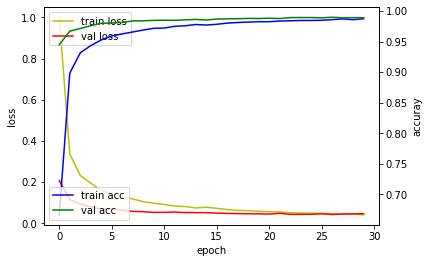

In [ ]:
import matplotlib.pyplot as plt

fig, loss_ax = plt.subplots()
acc_ax = loss_ax.twinx()

loss_ax.plot(hist2.history['loss'], 'y', label='train loss')
loss_ax.plot(hist2.history['val_loss'], 'r', label='val loss')

acc_ax.plot(hist2.history['accuracy'], 'b', label='train acc')
acc_ax.plot(hist2.history['val_accuracy'], 'g', label='val acc')

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuray')

loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')

plt.show()

In [ ]:
# evaluate model
score = model.evaluate(x_test, y_test, verbose = 1)
print('test_loss:', score[0])
print('test_acc:', score[1])

model.save("cnn_mnist.h5")